In [1]:
pip install tensorflow



     ------------------------------------ 385.0/385.0 MB 692.2 kB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 3.9 MB/s eta 0:00:00
     -------------------------------------- 126.6/126.6 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 267.2/267.2 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Fou

In [2]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 


In [5]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

60000
60000
10000
10000


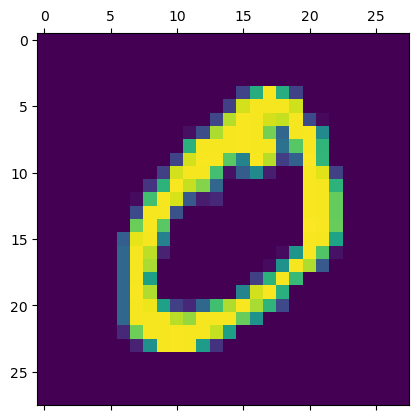

In [9]:
plt.matshow(X_train[1])

In [10]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train = X_train / 255
X_test = X_test / 255

In [16]:
x_train_flatten = X_train.reshape(len(X_train),28*28)
x_test_flatten = X_test.reshape(len(X_test),28*28)

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8168 - loss: 0.7117
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9134 - loss: 0.3139
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9185 - loss: 0.2897
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9247 - loss: 0.2703
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9270 - loss: 0.2609


In [19]:
model.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9134 - loss: 0.3056


[0.27216389775276184, 0.9243000149726868]

In [20]:
y_predicted = model.predict(x_test_flatten)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([2.6296884e-02, 1.5319999e-07, 7.9171017e-02, 9.5645040e-01,
       2.3004625e-03, 1.1331702e-01, 2.2242627e-06, 9.9977905e-01,
       9.8918967e-02, 6.1819124e-01], dtype=float32)

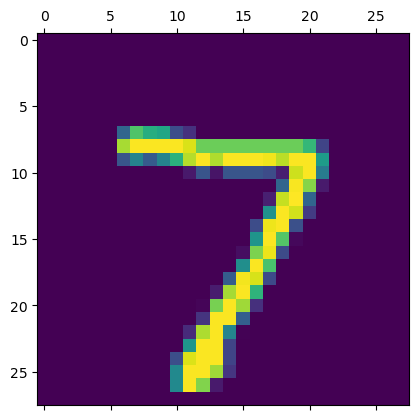

In [21]:
plt.matshow(X_test[0])

In [22]:
np.argmax(y_predicted[0])

7

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [24]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    2,    4,    2,   11,    0],
       [   7,    8,  924,   19,   10,    3,   12,   11,   36,    2],
       [   3,    0,   19,  929,    1,   20,    2,   11,   20,    5],
       [   2,    1,    4,    1,  936,    0,    7,    3,    9,   19],
       [  11,    1,    5,   37,   11,  778,    8,    4,   32,    5],
       [  16,    3,    7,    1,    9,   16,  902,    2,    2,    0],
       [   2,    5,   22,    8,    7,    1,    0,  959,    4,   20],
       [  10,    7,    6,   26,    9,   27,    8,   12,  866,    3],
       [  11,    7,    1,   11,   52,   10,    0,   38,    8,  871]])>

Text(95.72222222222221, 0.5, 'Truth')

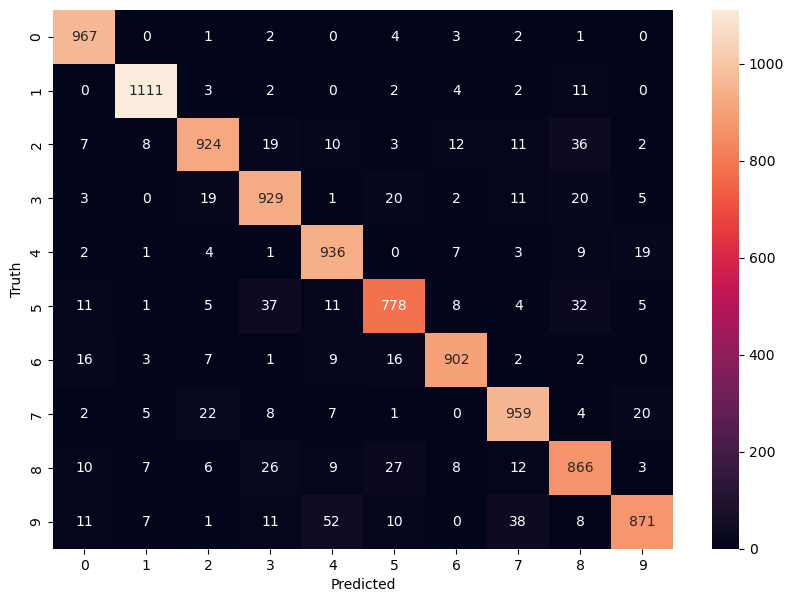

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5)

c:\Users\harinarayanan.babu\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8727 - loss: 0.4495
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9602 - loss: 0.1370
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9722 - loss: 0.0921
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9796 - loss: 0.0663
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9829 - loss: 0.0533


In [28]:
model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.0859


[0.07639303803443909, 0.975600004196167]